# **Modelling and Evaluation - Brain Tumor Detection**

## Objectives

* Answer business requirement 2: 
    * The client is interested in having a reliable and functional ML model to predict if an MRI scan of a brain has the absence or presence of a brain tumor. 

## Inputs



## Outputs




## Comments/Conclusions

---

## Import Packages

In [67]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

---

## Change Working Directory

In [68]:
cwd= os.getcwd()

In [69]:
os.chdir('/workspace/brain-tumor-detection')
print("You set a new current directory")

You set a new current directory


In [70]:
work_dir = os.getcwd()
work_dir

'/workspace/brain-tumor-detection'

---

## Set Input Directories

Set train, validation and test paths

In [71]:
my_data_dir = 'inputs/mriscans_dataset/mri-scans'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set Output Directory

In [72]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


## Set Label Names

In [73]:
labels = os.listdir(train_path)

print(f"Project Labels: {labels}")

Project Labels: ['healthy', 'tumor']


## Set Image Shape

In [74]:
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(177, 167, 3)

---

## Images Distribution

### Count Number of Images for Train, Test and Validation and Number of Images for Healthy & Tumor Scan Results

In [75]:
df_freq = pd.DataFrame([])
for folder in ['train', 'validation', 'test']:
    for label in labels:
        df_freq = df_freq.append(
            pd.Series(
                data={
                    'Set': folder,
                    'Label': label,
                    'Frequency': int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))}
                        ),
            ignore_index=True
        )

        print(
            f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images"
            )

print("\n")

# Create and print the frequency of images used (healthy & tumor)
total_mriscan_label_distribution = df_freq.groupby('Label')['Frequency'].sum()

dataset_weight = "Total dataset weight:\n"

for label, count in total_mriscan_label_distribution.items():
    dataset_weight += f"MRI Scan Result Label - {label}: {int(count)} images\n"

print(dataset_weight)

print("\n")

* train - healthy: 1345 images
* train - tumor: 1251 images
* validation - healthy: 192 images
* validation - tumor: 178 images
* test - healthy: 385 images
* test - tumor: 359 images


Total dataset weight:
MRI Scan Result Label - healthy: 1922 images
MRI Scan Result Label - tumor: 1788 images





### Bar Chart - Distribution of Images for Train, Test and Validation

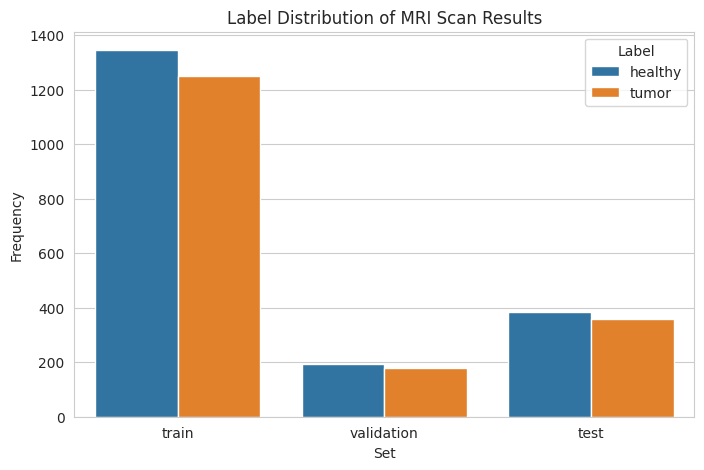

In [76]:
# Create & Save Bar Chart 
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label').set(title='Label Distribution of MRI Scan Results')

plt.savefig(f'{file_path}/labels_distribution.png', bbox_inches='tight', dpi=150)

plt.show()

### Pie Chart - Distribution of Images Across the Dataset (Healthy & Tumor)

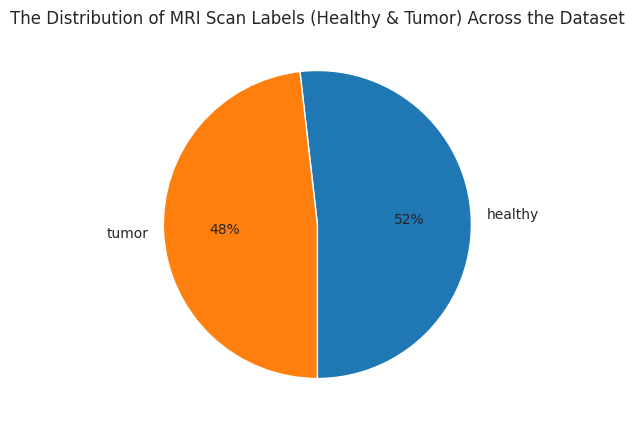

In [77]:
# Create & Save Pie Chart
plt.figure(figsize=(8, 5))
total_mriscan_label_distribution.plot(kind='pie', autopct='%.0f%%', startangle=270)
plt.title('The Distribution of MRI Scan Labels (Healthy & Tumor) Across the Dataset')
plt.ylabel('') 

plt.savefig(f'{file_path}/healthy_and_tumor_distribution.png', bbox_inches='tight', dpi=150)

plt.show()

---

## Image Data Augmentation

---

### Import ImageDataGenerator from the TensorFlow Library

In [78]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Initialise ImageDataGenerator

In [79]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1.0/255.0
                                          )

### Set Batch Size

In [80]:
batch_size = 20

### Augmentation of the Training Image Dataset

In [81]:
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

train_set.class_indices

Found 2596 images belonging to 2 classes.


{'healthy': 0, 'tumor': 1}

### Plot Augmented Training Image Dataset

(20, 177, 167, 3)


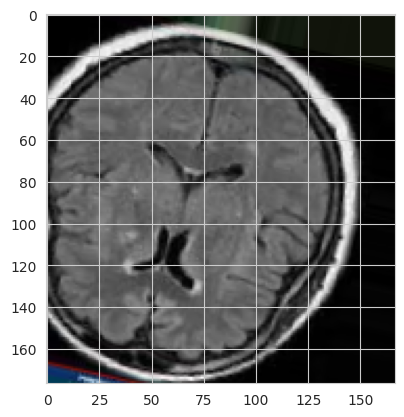

(20, 177, 167, 3)


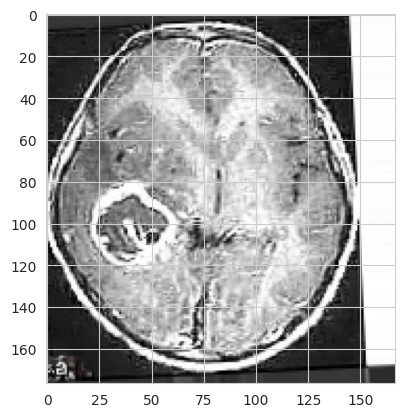

(20, 177, 167, 3)


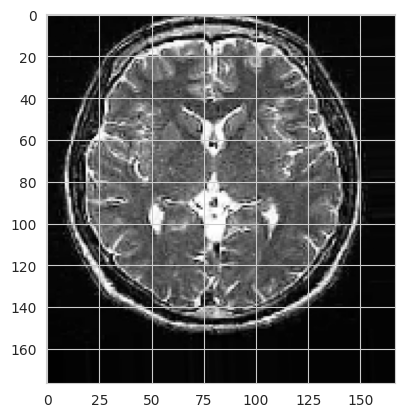

(20, 177, 167, 3)


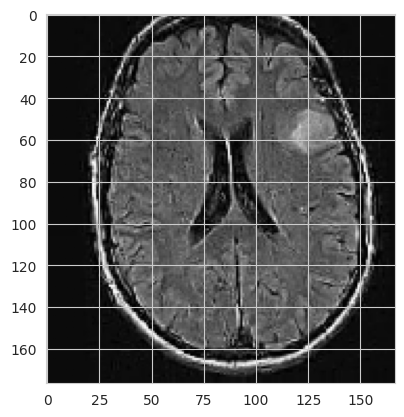

(20, 177, 167, 3)


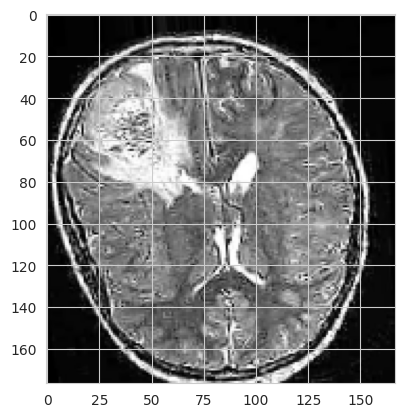

In [82]:
for _ in range(5):
    img, label = train_set.next()
    print(img.shape) 
    plt.imshow(img[0])
    plt.show()

### Augmentation of the Validation Image Dataset

In [83]:
validation_set = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices

Found 370 images belonging to 2 classes.


{'healthy': 0, 'tumor': 1}

### Plot Augmented Validation Image Dataset

(20, 177, 167, 3)


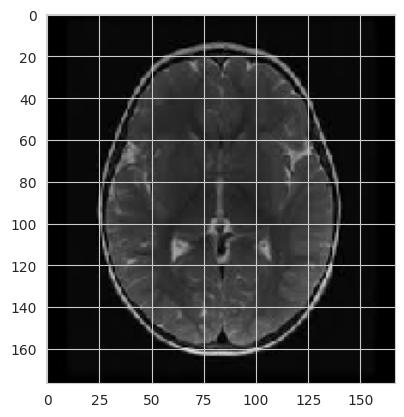

(20, 177, 167, 3)


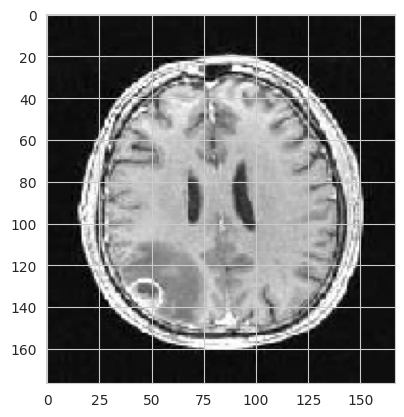

(20, 177, 167, 3)


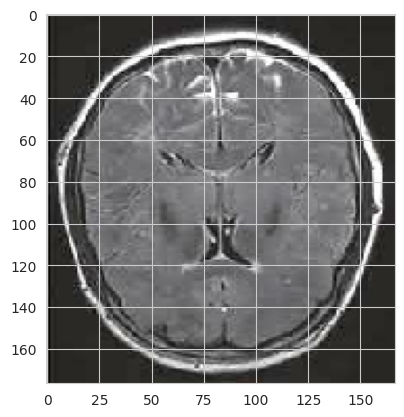

(20, 177, 167, 3)


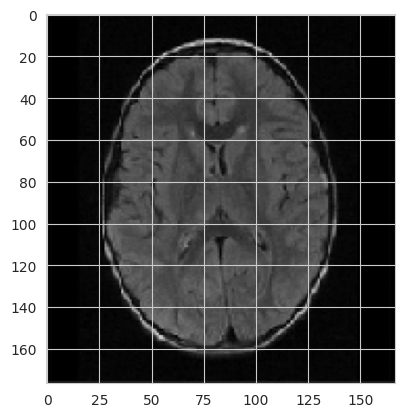

(20, 177, 167, 3)


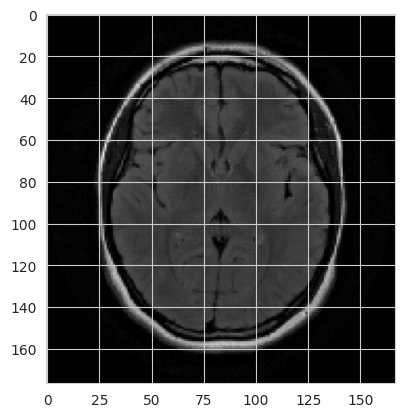

In [84]:
for _ in range(5):
    img, label = validation_set.next()
    print(img.shape) 
    plt.imshow(img[0])
    plt.show()

### Augmentation of the Test Image Dataset

In [85]:
test_set = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='binary',
                                                                  shuffle=False
                                                                  )

test_set.class_indices

Found 744 images belonging to 2 classes.


{'healthy': 0, 'tumor': 1}

### Plot Augmented Test Image Dataset

(20, 177, 167, 3)


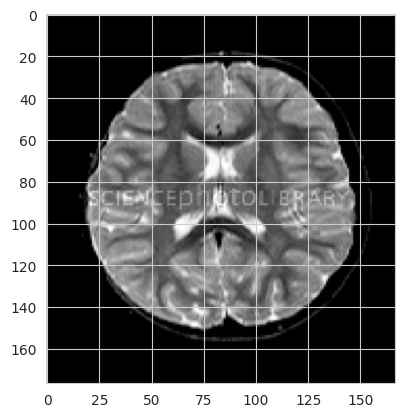

(20, 177, 167, 3)


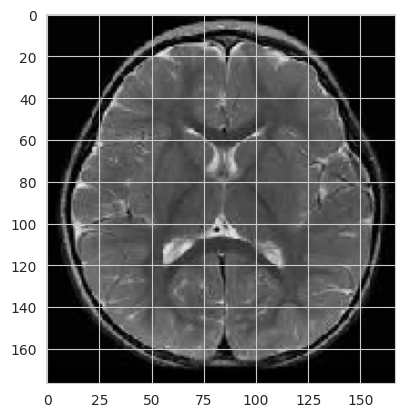

(20, 177, 167, 3)


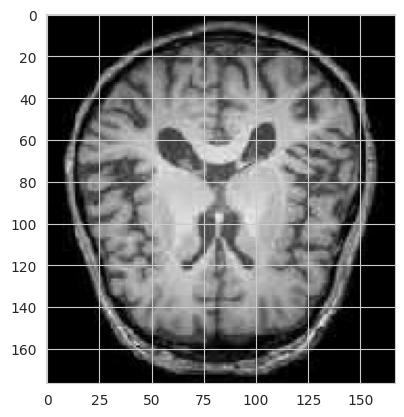

(20, 177, 167, 3)


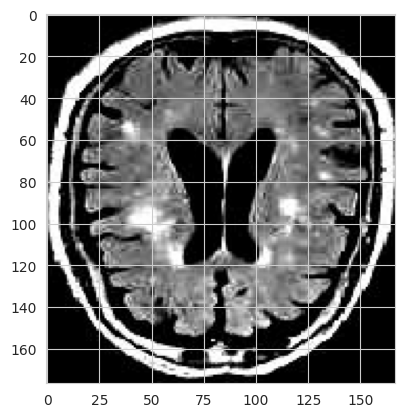

(20, 177, 167, 3)


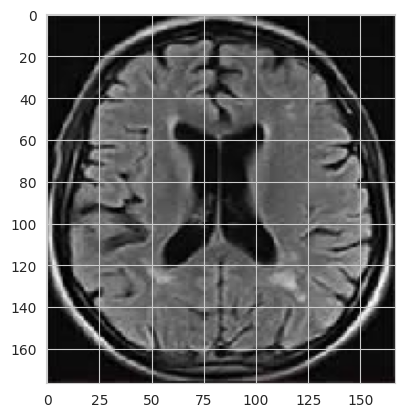

In [86]:
for _ in range(5):
    img, label = test_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

### Save Class Indices

In [87]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

---

## Model Creation

---

### Import Packages

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

### Model

In [90]:
def create_tf_model():
    model = Sequential()

    # Input Layer
    model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layers
    model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    # Fully Connected Layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(2, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model 

### Model Summary

In [91]:
create_tf_model().summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 175, 165, 32)      896       
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 87, 82, 32)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 85, 80, 64)        18496     
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 42, 40, 64)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 40, 38, 64)        36928     
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 20, 19, 64)        0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 24320)           

### Callbacks

In [92]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_accuracy', patience=2, mode='max', verbose=1)
model_checkpoint = ModelCheckpoint(filepath='outputs/v1/brain-tumor-detection.h5', monitor='val_accuracy', mode='max', save_best_only=True)

### Fit Model for Training

In [93]:
model = create_tf_model()
model.fit(train_set,
          epochs=15,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop, model_checkpoint],
          verbose=1
          )

Epoch 1/15
129/129 [==============================] - 66s 507ms/step - loss: 0.6462 - accuracy: 0.6242 - val_loss: 0.6554 - val_accuracy: 0.5946
Epoch 2/15
129/129 [==============================] - 53s 408ms/step - loss: 0.5945 - accuracy: 0.6875 - val_loss: 0.5491 - val_accuracy: 0.7243
Epoch 3/15
129/129 [==============================] - 52s 403ms/step - loss: 0.5612 - accuracy: 0.7077 - val_loss: 0.4729 - val_accuracy: 0.7730
Epoch 4/15
129/129 [==============================] - 60s 465ms/step - loss: 0.5389 - accuracy: 0.7286 - val_loss: 0.4607 - val_accuracy: 0.8027
Epoch 5/15
129/129 [==============================] - 52s 402ms/step - loss: 0.5340 - accuracy: 0.7209 - val_loss: 0.4487 - val_accuracy: 0.7838
Epoch 6/15
129/129 [==============================] - 52s 401ms/step - loss: 0.5076 - accuracy: 0.7434 - val_loss: 0.4225 - val_accuracy: 0.8135
Epoch 7/15
129/129 [==============================] - 52s 400ms/step - loss: 0.5030 - accuracy: 0.7601 - val_loss: 0.4747 - val_ac

### Save Best Model

In [ ]:
model.save('outputs/v1/brain_tumor_detection.h5')